In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl

In [3]:
!pip install statsmodels

## Simple Linear regression example

<div dir="rtl">להלן דוגמא: יש מפעל לייצור זיקוקי דינור. לכל עובד במפעל יש מספר שנות ניסיון שונה. מדי פעם עובדים נפצעים בזמן העבודה מאחר ומדובר במפעל עם חומרים מסוכנים. יש חומרות שונות לפציעות. החומרה מקבלת ציון בין 0 ל100 כאשר 100 זה הכי חמור. נא צרו משוואה ליניארית הקושרת את החומרה למספר שנות ניסיון. המשוואה אמורה לחזות מה תהיה החומרה בהינתן מס שנות ניסיון. 

In [89]:
# num_points = 45
# x_vals = np.linspace(2,12, num_points)
# a, b = 100, -3
# y_vals_tirgul_1 = a+b*x_vals + np.random.normal(0,5,num_points)

In [2]:
pkl.dump(y_vals_tirgul_1, open('../pkl/y_vals_tirgul_1.pkl', 'wb'))

NameError: name 'y_vals_tirgul_1' is not defined

In [4]:
y_vals_tirgul_1 = pkl.load(open('../pkl/y_vals_tirgul_1.pkl', 'rb'))

In [8]:
num_points = 45
x_vals = np.linspace(2,12, num_points)
x_vals1 = sm.add_constant(x_vals)
df_data = pd.DataFrame(np.append(x_vals1.reshape( x_vals1.shape[0],2), y_vals_tirgul_1.reshape(x_vals.shape[0],1), axis = 1), columns = ['intercept', 'expirience', 'severity'])
df_data.head()

,intercept,expirience,severity
0,1.0,2.000000,102.254323
1,1.0,2.227273,82.437164
2,1.0,2.454545,104.149337
3,1.0,2.681818,91.398245
4,1.0,2.909091,90.637359


In [ ]:
x_vals1 = sm.add_constant(x_vals)
x_vals1[:3,:]

### Using Statmodels

In [9]:
# Assuming X_train and y_train are your training data
x_vals1 = sm.add_constant(x_vals)  # Add a constant (intercept) term to the features
## If we don't add it, the intercept will be 0.
# Create a linear regression model
model = sm.OLS(df_data['severity'], df_data[['intercept', 'expirience']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               severity   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.22e-13
Time:                        18:02:22   Log-Likelihood:                -141.75
No. Observations:                  45   AIC:                             287.5
Df Residuals:                      43   BIC:                             291.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     99.9495      2.217     45.093      0.0

## Plotting the graph

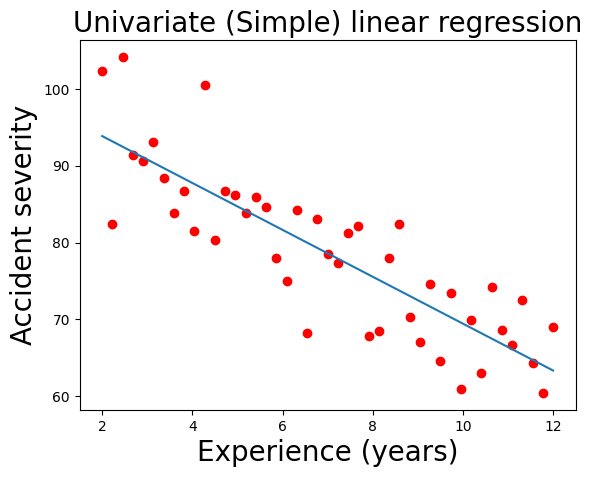

In [10]:
plt.figure()
plt.scatter(x_vals, y_vals_tirgul_1, color = 'r')
plt.plot(x_vals, results.predict(x_vals1))
plt.xlabel('Experience (years)', fontsize = 20)
plt.ylabel('Accident severity', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

The univariate linear regression equation is:
$$ \hat{Y_i} = b_0 + b_1 x_i $$


<div dir="rtl"> מה היא משוואת הרגרסיה?

In [11]:
X = x_vals
Y = y_vals_tirgul_1

# Calculate means
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Calculate the slope (beta1)
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X) ** 2)
beta1 = numerator / denominator

# Calculate the intercept (beta0)
beta0 = mean_Y - beta1 * mean_X

print("Slope (beta1):", beta1)
print("Intercept (beta0):", beta0)

Slope (beta1): -3.049510640272108
Intercept (beta0): 99.94951155804033


### How do I know if my model in any good?


In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               severity   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.22e-13
Time:                        18:05:36   Log-Likelihood:                -141.75
No. Observations:                  45   AIC:                             287.5
Df Residuals:                      43   BIC:                             291.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     99.9495      2.217     45.093      0.0

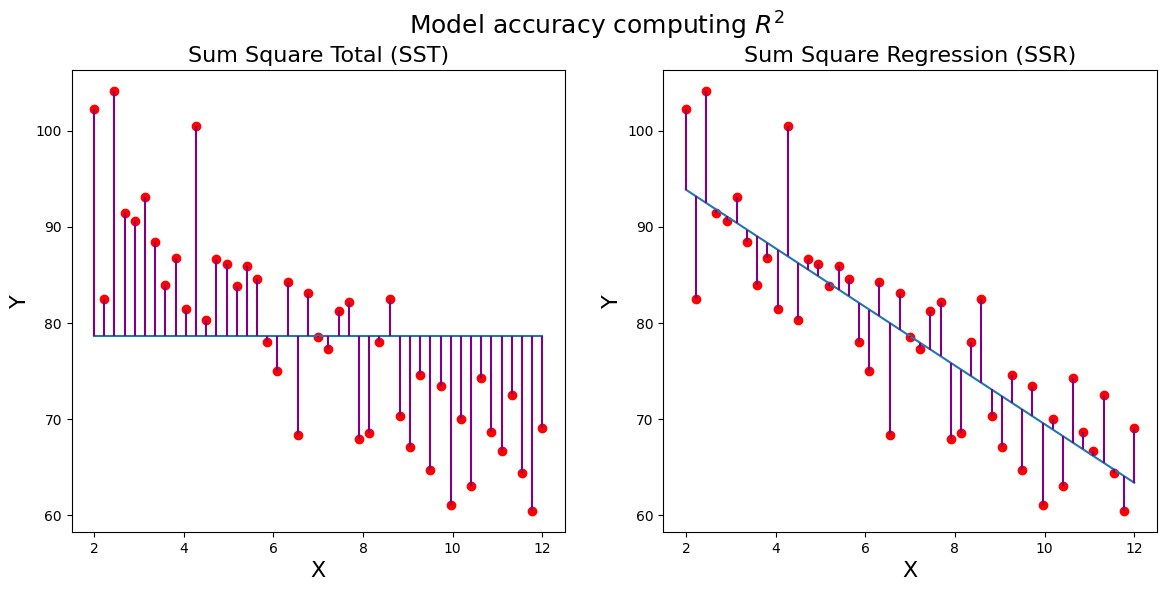

In [15]:
fontsize = 16
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Model accuracy computing $R^2$', fontsize = fontsize+2)
ax1.scatter(x_vals, y_vals_tirgul_1, color = 'r')
ax1.plot(x_vals, np.ones(y_vals_tirgul_1.shape[0])*y_vals_tirgul_1.mean())

# single line
ax1.vlines(x = x_vals, ymin = y_vals_tirgul_1, ymax = np.ones(y_vals_tirgul_1.shape[0])*y_vals_tirgul_1.mean(),
           colors = 'purple',
           label = 'vline_multiple - full height')
ax1.set_xlabel('X', fontsize = fontsize)
ax1.set_ylabel('Y', fontsize = fontsize)
ax1.set_title('Sum Square Total (SST)', fontsize = fontsize)


ax2.scatter(x_vals, y_vals_tirgul_1, color = 'r')
ax2.plot(x_vals, results.predict(x_vals1))
ax2.vlines(x = x_vals, ymin = y_vals_tirgul_1, ymax = results.predict(x_vals1),
           colors = 'purple',
           label = 'vline_multiple - full height')
ax2.set_xlabel('X', fontsize = fontsize)
ax2.set_ylabel('Y', fontsize = fontsize)

# plt.xlabel('X', fontsize = 20)
# plt.ylabel('Y', fontsize = 20)
ax2.set_title('Sum Square Regression (SSR)', fontsize = fontsize)
plt.show()

<div dir="rtl"> מה היא חומרת התאונה הצפויה עבור מישהו עם 10 שנות ניסיון?

$\hat{Severity} = 99.9495 - 3.0495*Experience$

In [16]:
Severity = 99.9495 - 3.0495*10 # By simply inserting the valus into the equation
# This can be done directly by:
Severity, results.predict(np.array([1,10]))

(69.4545, array([69.45440516]))

<div dir="rtl"> מה היא חומרת התאונה הצפויה עבור מישהו עם 30 שנות ניסיון?

In [17]:
Severity = 99.9495 - 3.0495*45 # By simply inserting the valus into the equation
# This can be done directly by:
Severity, results.predict(np.array([1,45]))

(-37.27799999999999, array([-37.27846725]))

<div dir="rtl"> מה לא הגיוני בפתרון שקיבלנו?
לפי הפתרון קיבלנו תשובה שלילית, שזה לא ערך אפשרי. המסקנה לכך היא שהמשוואה שלנו לא חוזה בצורה טובה ערכים מחוץ לטווח הערכים של שנות נסיון בנתונים שלנו. לדבר הזה קוראים אקסטרפולציה. וננסה להיזהר מזה כשאר מנתחים נתונים.

## Model fit

<div dir="rtl"> הערך שהתקבל 0.75. מה שמעיד על רמת חיזוי בינונית. חשוב לציין שאנחנו מעניינים להגיע לערך כמה שיותר קרוב ל-1ץ בתחומים מסוימים 0.75 נחשב לערך מאד גבוה (רפואה).

## Model Assumptions

<div dir="rtl"> נא לבדוק האם הנחות המודל מתקיימות

### Linearity

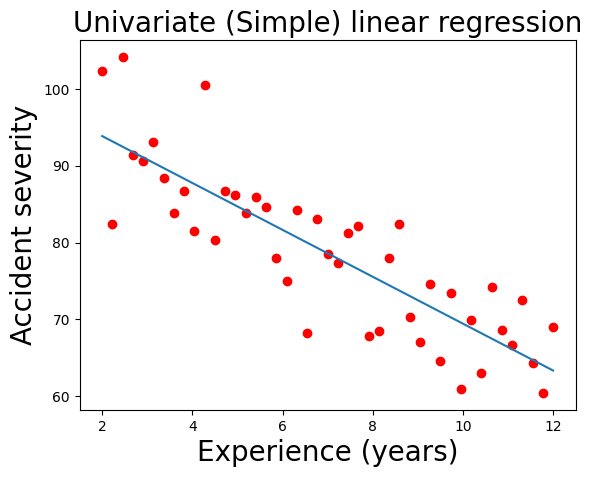

In [98]:
plt.figure()
plt.scatter(x_vals, y_vals_tirgul_1, color = 'r')
plt.plot(x_vals, results.predict(x_vals1))
plt.xlabel('Experience (years)', fontsize = 20)
plt.ylabel('Accident severity', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

<div dir="rtl">על מנת לבדוק ליניאריות ניתן לבחון את הגרף ויזואלית על סמך הנקודות האמיתיות ועל סמך  גרף השאריות

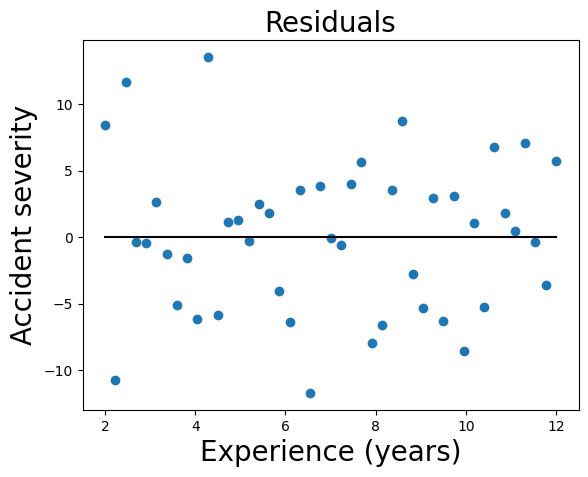

In [100]:
plt.figure()
plt.scatter(x_vals,results.resid)
plt.plot(x_vals, np.zeros(x_vals.shape[0]), color = 'black')
plt.xlabel('Experience (years)', fontsize = 20)
plt.ylabel('Accident severity', fontsize = 20)
plt.title('Residuals', fontsize = 20)
plt.show()

<div dir="rtl"> ניתן לראות שבמקרה הזה השגיאות נעות באופן אקראי סביב 0 ואין איזו מגמה לאיזשהו כיוון.

## Homoscedasticity

<div dir="rtl"> במקרה זה נרצה לראות שאין שינוי מונוטני בגודל השגיאות. שוב נעשה גרף של השאריות

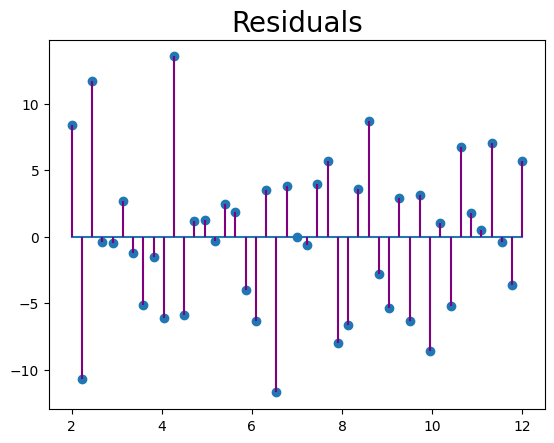

In [101]:
plt.figure()
plt.scatter(x_vals,results.resid)
plt.plot(x_vals, np.zeros(x_vals.shape[0]))
plt.vlines(x = x_vals, ymin = results.resid, ymax =  np.zeros(x_vals.shape[0]),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.title('Residuals', fontsize = 20)

plt.show()

## Normality

<div dir="rtl"> נעשה היסטוגרמה של השגיאות ונראה האם הצורה שלה נראית כמו התפלגות נורמלית

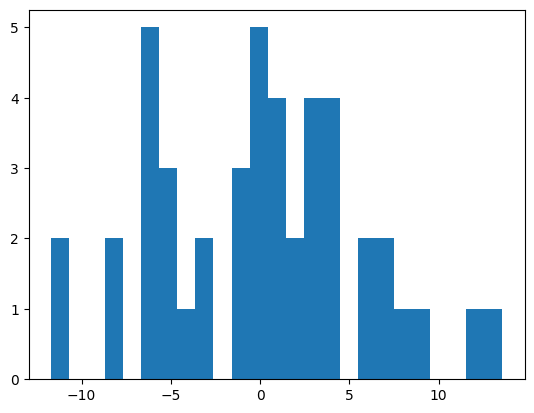

In [103]:
plt.figure()
plt.hist(results.resid, bins = 25)
plt.show()